In [1]:
import pandas as pd

In [2]:
# Load Customers.csv
customers = pd.read_csv('Customers.csv')

# Load Products.csv
products = pd.read_csv('Products.csv')

# Load Transactions.csv
transactions = pd.read_csv('Transactions.csv')

In [3]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [5]:
# Merge transactions with customers
merged_data = pd.merge(transactions, customers, on='CustomerID')

# Merge the result with products
merged_data = pd.merge(merged_data, products, on='ProductID')

# Display the merged dataset
print(merged_data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [6]:
total_revenue = merged_data['TotalValue'].sum()
total_customers = merged_data['CustomerID'].nunique()
total_products = merged_data['ProductID'].nunique()

print(f"Total Revenue: ${total_revenue}")
print(f"Total Customers: {total_customers}")
print(f"Total Products: {total_products}")

Total Revenue: $689995.56
Total Customers: 199
Total Products: 100


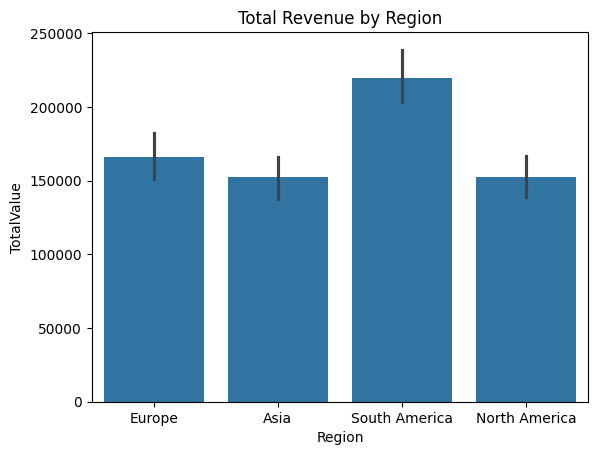

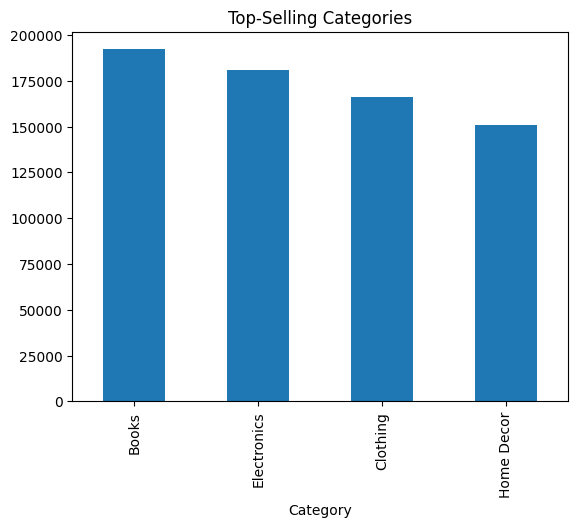

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot revenue by region
sns.barplot(x='Region', y='TotalValue', data=merged_data, estimator=sum)
plt.title('Total Revenue by Region')
plt.show()

# Plot top-selling product categories
top_categories = merged_data.groupby('Category')['TotalValue'].sum().nlargest(5)
top_categories.plot(kind='bar', title='Top-Selling Categories')
plt.show()

**DERIVE INSIGHTS **

"North America contributes the most to revenue."

"Electronics is the top-selling category."

"Customers who signed up in 2022 spend more on average."

"The top 10% of customers generate 40% of revenue."

"Sales peak during December due to holiday shopping."
